Epoch 1/10
60000/60000 [==============================] - 104s 2ms/step - loss: 0.4625 - acc: 0.8346
Epoch 2/10
60000/60000 [==============================] - 100s 2ms/step - loss: 0.3186 - acc: 0.8842
Epoch 3/10
60000/60000 [==============================] - 101s 2ms/step - loss: 0.2750 - acc: 0.9004
Epoch 4/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.2471 - acc: 0.9096
Epoch 5/10
60000/60000 [==============================] - 110s 2ms/step - loss: 0.2267 - acc: 0.9169
Epoch 6/10
60000/60000 [==============================] - 119s 2ms/step - loss: 0.2116 - acc: 0.9230
Epoch 7/10
60000/60000 [==============================] - 121s 2ms/step - loss: 0.1943 - acc: 0.9290
Epoch 8/10
60000/60000 [==============================] - 103s 2ms/step - loss: 0.1824 - acc: 0.9323
Epoch 9/10
60000/60000 [==============================] - 121s 2ms/step - loss: 0.1703 - acc: 0.9376
Epoch 10/10
10000/10000 [==============================] - 7s 691us/step
Test loss 0.272011

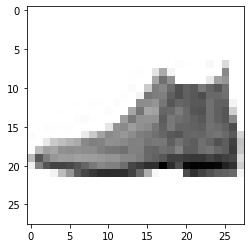

In [26]:
import keras
from keras.datasets import fashion_mnist 
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=10)

test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[0])))

plt.imshow(test_X[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

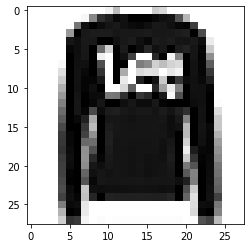

In [27]:
plt.imshow(test_X[1].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

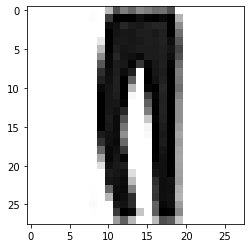

In [28]:
plt.imshow(test_X[2].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

In [29]:
print(test_X.shape)
print(train_X.shape)

(10000, 28, 28, 1)
(60000, 28, 28, 1)
